# Assignment 3
## Sungwon Lee
### 017473950

# 1. (5 pts) Linear regression with gradient decent

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_csv("housing.csv")
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [214]:
# feature scailing

Y = df.iloc[:, :1]
X = df.iloc[:, 1:]

X_copy = X.copy()

strlist = ["driveway", "recroom", "fullbase", "gashw", "airco", "prefarea"]
intlist = ["lotsize", "bedrooms", "bathrms", "stories", "garagepl"]
X_copy[strlist] = X_copy[strlist].map(lambda x : 1 if x == "yes" else 0)
X_copy[intlist] = (X_copy[intlist] - X_copy[intlist].mean())/X_copy[intlist].std()
X_normalized = X_copy
X_normalized.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0.322732,0.047192,-0.568973,0.221501,1,0,1,0,0,0.357239,0
1,-0.530526,-1.308947,-0.568973,-0.930304,1,0,0,0,0,-0.803788,0
2,-0.964074,0.047192,-0.568973,-0.930304,1,0,0,0,0,-0.803788,0
3,0.691709,0.047192,-0.568973,0.221501,1,1,0,0,0,-0.803788,0
4,0.557955,-1.308947,-0.568973,-0.930304,1,0,0,0,0,-0.803788,0


## 1-2. (3pts) Please build a gradient descent algorithm based on the following formulas.

In [209]:

def gradient_descent(X, Y, lr, num_iter):
    np.random.seed(240)
    # add initial bias 
    X["intercept"] = 1
    initial_weight = np.random.normal(0, 0.01, len(X.columns))
    X = np.array(X)
    Y = np.array(Y)
    for iteration in range(num_iter):
        y_pred = X.dot(initial_weight)
        gradient = X.T.dot((y_pred - Y.flatten())) / len(Y)
        cost_func = np.mean((y_pred - np.array(Y))**2)
        initial_weight -= lr * gradient
        rmse = np.sqrt(cost_func)

        if iteration <= 9:

            print(f"Epoch : {iteration + 1}, RMSE : {rmse}")

        else:
            continue

    y_final_pred = X.dot(initial_weight)

    return y_final_pred

In [210]:
y_pred = gradient_descent(X_normalized, Y, lr = 0.01, num_iter = 5000)

Epoch : 1, RMSE : 73159.25637838492
Epoch : 2, RMSE : 71804.7475948366
Epoch : 3, RMSE : 70488.71150826495
Epoch : 4, RMSE : 69210.37391089038
Epoch : 5, RMSE : 67968.9736667517
Epoch : 6, RMSE : 66763.76212902085
Epoch : 7, RMSE : 65594.00257161645
Epoch : 8, RMSE : 64458.96963648326
Epoch : 9, RMSE : 63357.94879796995
Epoch : 10, RMSE : 62290.2358457909


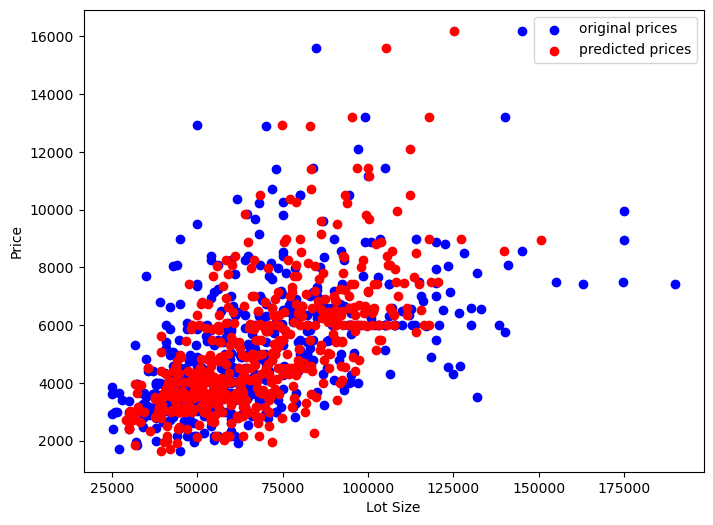

In [211]:
plt.figure(figsize=(8,6))
plt.scatter(Y, X.lotsize, c = 'blue', label = "original prices")
plt.scatter(y_pred, X.lotsize, c = 'red', label = "predicted prices")
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.legend()

plt.show()

In [212]:
r2 = r2_score(Y, y_pred)

r2

0.6728365245106411

## 1-1. (3pts) Please build a gradient descent algorithm based on the following formulas.

In [216]:
def gradient_descent_sum_form(X, Y, lr, num_iter):
    # Add intercept (bias) term to X
    X["intercept"] = 1
    initial_weight = np.random.normal(0, 0.01, len(X.columns))  # Initialize weights
    
    # Convert to numpy arrays
    X = np.array(X)
    Y = np.array(Y).flatten()  # Flatten Y to ensure it's a 1D array
    
    m = len(Y)  # Number of samples
    
    # Gradient Descent
    for iteration in range(num_iter):
        # Initialize gradient and cost function
        gradient = np.zeros_like(initial_weight)
        cost_func = 0
        
        # Iterate over all data points
        for i in range(m):
            # Compute the prediction for the i-th data point
            y_pred = np.dot(X[i], initial_weight)
            
            # Compute the error (difference between predicted and actual)
            error = y_pred - Y[i]
            
            # Compute the gradient for each weight and accumulate
            gradient += error * X[i]
            
            # Accumulate the squared error for cost function
            cost_func += error ** 2
        
        # Compute the mean cost (MSE)
        cost_func = cost_func / m
        
        # Update the weights using the learning rate
        initial_weight -= lr * gradient / m
        
        # Compute RMSE
        rmse = np.sqrt(cost_func)
        
        # Print RMSE every 10 iterations
        if iteration <= 9:
            print(f"Epoch {iteration + 1}, RMSE: {rmse}")
    
    # Final prediction
    y_final_pred = X.dot(initial_weight)
    
    return y_final_pred

Epoch 1, RMSE: 73159.25657414515
Epoch 2, RMSE: 71635.05616494494
Epoch 3, RMSE: 70146.67067343219
Epoch 4, RMSE: 68693.33839987121
Epoch 5, RMSE: 67274.31486430913
Epoch 6, RMSE: 65888.8724003546
Epoch 7, RMSE: 64536.299756275745
Epoch 8, RMSE: 63215.90170319551
Epoch 9, RMSE: 61926.99865016736
Epoch 10, RMSE: 60668.926265922215


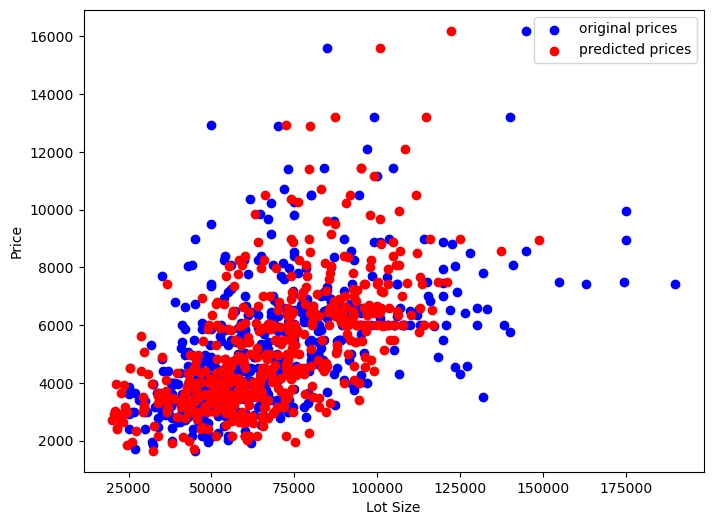

In [218]:
y_pred_sum_form = gradient_descent_sum_form(X_normalized, Y, lr=0.01, num_iter=1000)

plt.figure(figsize=(8,6))
plt.scatter(Y, X.lotsize, c = 'blue', label = "original prices")
plt.scatter(y_pred_sum_form, X.lotsize, c = 'red', label = "predicted prices")
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.legend()

plt.show()

In [219]:
r2 = r2_score(Y, y_pred_sum_form)

r2

0.6444028313463248

In [201]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_normalized, Y)

In [202]:
reg.coef_

array([[ 7688.94772689,  1350.89725472,  7198.7133627 ,  5692.75666365,
         6687.77889042,  4511.28382611,  5452.38553945, 12831.40626641,
        12632.89040482,  3656.09903403,  9369.51323893]])

In [203]:
reg.intercept_

array([52881.41142848])

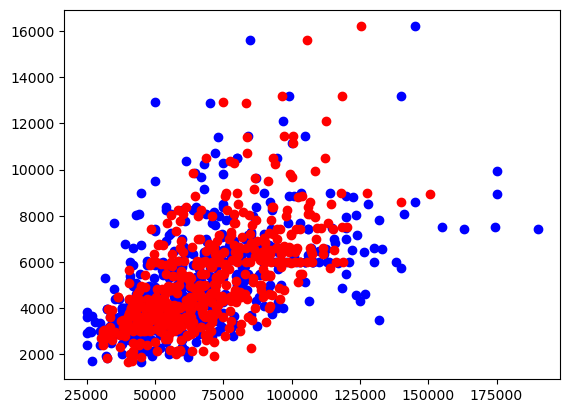

In [204]:
plt.scatter(Y, X.lotsize, c = 'blue')
plt.scatter(reg.predict(X_normalized), X.lotsize, c = 'red')


In [205]:
r2_score(Y, reg.predict(X_normalized))

0.6731236206414506

Epoch 1, RMSE: 73159.24150714681
Epoch 2, RMSE: 71597.69294789241
Epoch 3, RMSE: 70080.57414887314
Epoch 4, RMSE: 68606.19162359006
Epoch 5, RMSE: 67172.94144665031
Epoch 6, RMSE: 65779.30395814708
Epoch 7, RMSE: 64423.838769285634
Epoch 8, RMSE: 63105.18005483315
Epoch 9, RMSE: 61822.03211833545
Epoch 10, RMSE: 60573.16521643334
Epoch 11, RMSE: 59357.41162902406
Epoch 12, RMSE: 58173.661962442144
Epoch 13, RMSE: 57020.86167327743
Epoch 14, RMSE: 55898.007800900865
Epoch 15, RMSE: 54804.14589722875
Epoch 16, RMSE: 53738.3671427192
Epoch 17, RMSE: 52699.80563805875
Epoch 18, RMSE: 51687.635861459
Epoch 19, RMSE: 50701.07028194132
Epoch 20, RMSE: 49739.357119438995
Epoch 21, RMSE: 48801.778242990316
Epoch 22, RMSE: 47887.64719873007
Epoch 23, RMSE: 46996.307359810686
Epoch 24, RMSE: 46127.130190796
Epoch 25, RMSE: 45279.51361946976
Epoch 26, RMSE: 44452.88050938723
Epoch 27, RMSE: 43646.677226870146
Epoch 28, RMSE: 42860.37229650404
Epoch 29, RMSE: 42093.45513954048
Epoch 30, RMSE: 41345

C:\Users\pumad\AppData\Local\Temp\ipykernel_33800\4265506991.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[binary_cols] = data[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)


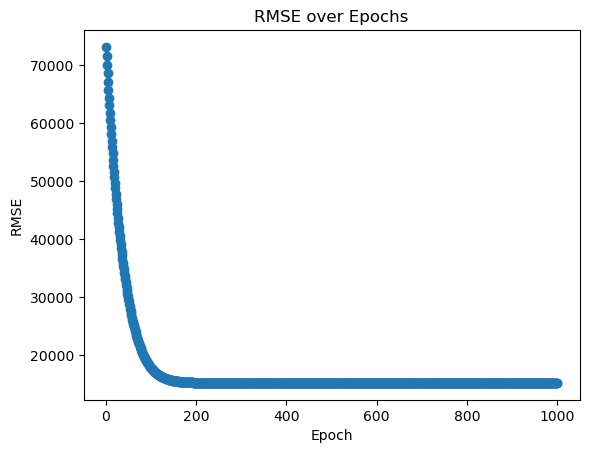

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("housing.csv")


# Encode binary features
binary_cols = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
data[binary_cols] = data[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)

# Separate features and target
X = data.drop('price', axis=1)
y = data['price'].values

# Normalize features
X_normalized = (X - X.mean()) / X.std()

# Add intercept (bias) term to X
X_normalized.insert(0, 'intercept', 1)

# Convert to numpy arrays
X = X_normalized.values
y = y.reshape(-1, 1)

# Initialize weights
np.random.seed(0)
weights = np.random.normal(0, 0.01, X.shape[1])

# Set hyperparameters
learning_rate = 0.01
epochs = 1000

# Store RMSE values
rmse_history = []

# Gradient Descent
for epoch in range(epochs):
    # Predictions
    predictions = X.dot(weights)
    
    # Calculate error
    errors = predictions - y.flatten()
    
    # Compute RMSE
    rmse = np.sqrt(np.mean(errors**2))
    rmse_history.append(rmse)
    print(f'Epoch {epoch + 1}, RMSE: {rmse}')
    
    # Calculate gradients
    gradients = (2 / len(y)) * X.T.dot(errors)
    
    # Update weights
    weights -= learning_rate * gradients

# Plot RMSE over epochs
plt.plot(range(1, epochs + 1), rmse_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over Epochs')
plt.show()


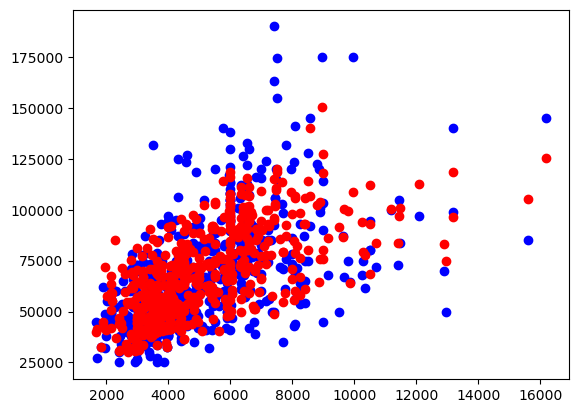

In [191]:
plt.scatter(data.lotsize, Y, c = 'blue')
plt.scatter(data.lotsize, predictions, c = 'red')

In [192]:
r2_score(Y, predictions)

0.6731236203431711

In [ ]:
plt.scatter(Y